In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# Path where the data is stored
SOURCE_PATH = '../../data'
# Directory inside SOURCE_PATH where the original data is stored
ORIGINAL_DATA_DIR = '/EXOSAFE'
# Directory inside SOURCE_PATH where the derived data is stored
DERIVED_DATA_DIR = '/derived_data'

# Number of force cells in the robotic leg
N_CELLS = 8

# Experiment params
DATE_EXPERIMENTS = '24022021'
N_EXPERIMENTS = 15


In [3]:
def process_parameters_sheet(params_df):
    '''
    Process the data in the given pd.DataFrame from the raw excel sheet. 
    
    Args:
    - params_df (pd.DataFrame): DataFrame of the parameters excel sheet.
    
    Returns:
    - params_dict (dict): Dictionary with all the parameter in the input DataFrame.
    '''
    params_dict = {}
    params_dict['ExoHipMissalign'] = params_df.iloc[2, 1]
    params_dict['ExoKneeMissalign'] = params_df.iloc[2, 2]
    params_dict['MarchVelocity'] = params_df.iloc[0, 11]
    params_dict['TimeShift'] = params_df.iloc[0, 12]
    params_dict['SkinConfig'] = params_df.iloc[0, 13]
    
    return params_dict

In [4]:
# Select only the relevant excel sheets 
sheets = ['Parameters', 'RawForces', 'ForceCells', 'H3raw', 'H3processed', 'Leg-Replica']
# Load the data
data_df = pd.read_excel(SOURCE_PATH + ORIGINAL_DATA_DIR + '/' + DATE_EXPERIMENTS + '/0{}-'.format(0 + 1) + DATE_EXPERIMENTS + '.xlsx', sheet_name=sheets)

In [5]:
data_df[sheets[0]] = process_parameters_sheet(data_df[sheets[0]])

In [6]:
def shift_leg_data(df, time_shift, total_len, data_res=0.01):
    '''
    Shift the data from the leg replica using the known time_shift from the experiment
    parameters to match the exoskeleton data in time and lenght.
    
    Args:
    - df (pd.DataFrame): DataFrame with the data of the leg replica
    - time_shift (float): Shifting time to applied to the data.
    - total_len (int): Total desired lenght for the data.
    - data_res (float): Data resolution (in seconds).
    
    Returns:
    - (pd.DataFrame): DataFrame with the data of the leg replica shifted.
    '''
    idx_start = math.ceil(time_shift / data_res)
    idx_end = total_len + idx_start
    return df.iloc[idx_start:idx_end].reset_index(drop=True)

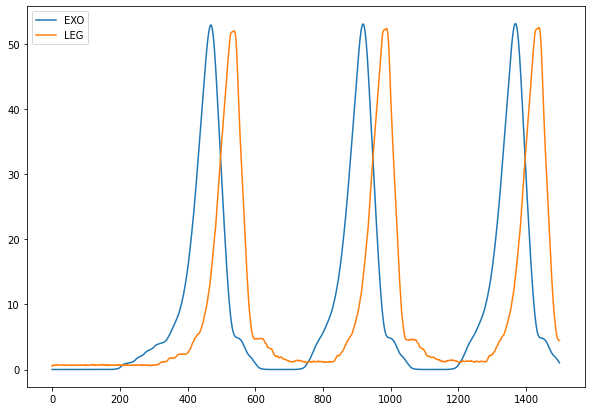

In [7]:
plt.figure(figsize=(10,7))
plt.plot(data_df[sheets[4]]['LKneePos'].iloc[:1500], label='EXO')
plt.plot(data_df[sheets[5]]['LegKneePositionFiltered'].iloc[:1500], label='LEG')
plt.legend()
plt.show()

In [10]:
df = data_df[sheets[5]].iloc[3:]
time_shift = data_df[sheets[0]]['TimeShift']
total_len = len(data_df[sheets[4]])
data_res = 0.01

idx_start = math.ceil(time_shift / data_res)
idx_end = total_len + idx_start
leg_df_processed = df.iloc[idx_start:idx_end].reset_index(drop=True)

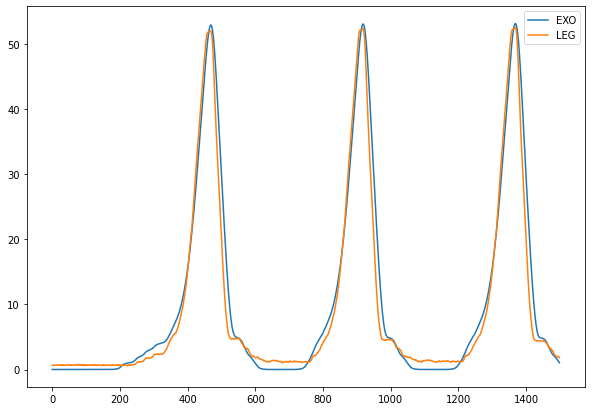

In [11]:
plt.figure(figsize=(10,7))
plt.plot(data_df[sheets[4]]['LKneePos'].iloc[:1500], label='EXO')
plt.plot(leg_df_processed['LegKneePositionFiltered'].iloc[:1500], label='LEG')
plt.legend()
plt.show()